# titanic

In [1]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
df = titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:
df.groupby("sex")["alive"].value_counts()

sex     alive
female  yes      233
        no        81
male    no       468
        yes      109
Name: alive, dtype: int64

In [3]:
import pandas as pd

# Yaşları belirlediğiniz aralıklara bölmek için işlev tanımlama
def yas_araligina_ayir(yas):
    if yas <= 18:
        return '0-18'
    elif yas <= 40:
        return '19-40'
    elif yas <= 80:
        return '41-80'
    else:
        return '81+'
    
    
df['age range'] = df['age'].apply(yas_araligina_ayir)


# 'yaslar' sütununu kullanarak yeni bir 'yas_araligi' sütunu ekleyin
#kategorilere gore siralamaliyiz
yas_araliklari_siralama = ['0-18', '19-40', '41-80', '81+']
df['age range'] = pd.Categorical(df['age range'], categories=yas_araliklari_siralama, ordered=True)


df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age range
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,19-40
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,19-40
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,19-40
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,19-40
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,19-40


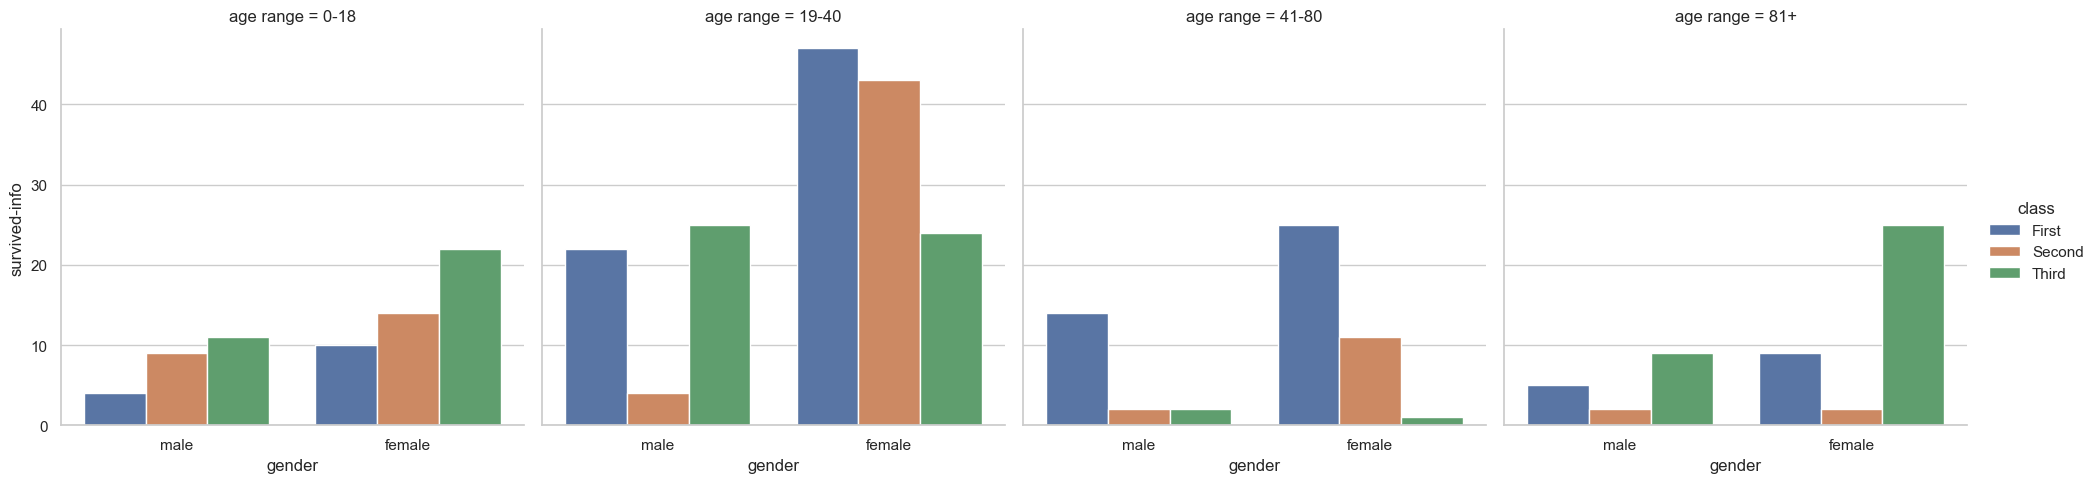

In [4]:
#sns.barplot(x = "sex" , y = "survived" , hue="class" , errorbar=None , col = "yas_araligi" ,  data = df);

import matplotlib.pyplot as plt

# Çubuk grafik oluşturma

sns.set(style="whitegrid")

#Caprazlamada toplam hayatta kalan sayıları almak için "sum" işlevini kullanma
g = sns.catplot(x="sex", y="survived", hue="class",
                col="age range", 
                kind="bar", 
                errorbar=None ,
                data=df ,
                estimator=sum)

g.set_axis_labels("gender", "survived-info")
# yaziyi gösterme
plt.show()